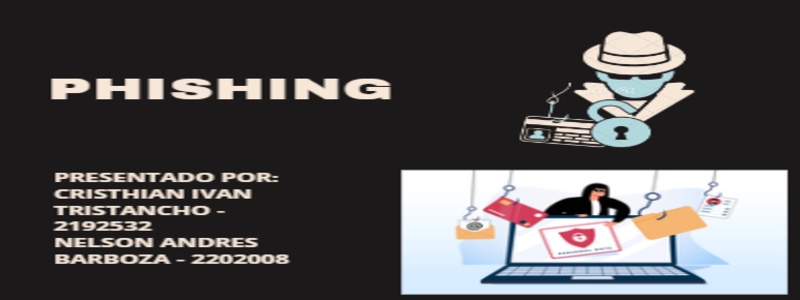

# **OBJETIVO**
## El objetivo de este proyecto es desarrollar un modelo predictivo capaz de identificar páginas web de phishing basándose en diversas características extraídas de las páginas. Utilizando un conjunto de datos que contiene información sobre múltiples atributos de las páginas web, el modelo clasificará si una página es legítima o es una posible página de phishing. Este proyecto busca mejorar la seguridad en línea proporcionando una herramienta eficiente para detectar y prevenir el acceso a sitios fraudulentos, protegiendo así a los usuarios de posibles robos de información y otros ataques cibernéticos.

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/IA-Project')

Mounted at /content/drive


In [3]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import seaborn as sns
sns.set_theme()
pd.__version__

'2.0.3'

In [4]:
dataset = pd.read_csv("/content/drive/My Drive/IA-Project/Phishing_Legitimate_full.csv", sep=",")
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.shape

(10000, 50)

In [6]:
dataset.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [7]:
dataset = dataset.drop (['DoubleSlashInPath', 'ExtFavicon', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'HttpsInHostname', 'RelativeFormAction' ], axis = 1)

In [8]:
dataset.columns
dataset.shape

(10000, 25)

In [9]:
dataset.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,...,DomainInPaths,HostnameLength,PathLength,QueryLength,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,InsecureForms,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,0.32320,0.073800,0.458600,0.277200,0.002300,...,0.428900,18.82430,35.564900,8.606500,0.109300,0.057100,0.241334,0.392932,0.844000,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,1.11466,0.622248,1.344793,1.117356,0.047906,...,0.494944,8.11654,24.588502,24.313053,0.368737,0.232045,0.342370,0.387292,0.362873,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.030303,1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18.00000,30.000000,0.000000,0.000000,0.000000,0.071429,0.247511,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,22.00000,48.000000,0.000000,0.000000,0.000000,0.315874,0.785714,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,18.00000,19.000000,23.000000,22.000000,1.000000,...,1.000000,137.00000,161.000000,188.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  int64  
 1   NumDots             10000 non-null  int64  
 2   SubdomainLevel      10000 non-null  int64  
 3   PathLevel           10000 non-null  int64  
 4   UrlLength           10000 non-null  int64  
 5   NumUnderscore       10000 non-null  int64  
 6   NumPercent          10000 non-null  int64  
 7   NumQueryComponents  10000 non-null  int64  
 8   NumAmpersand        10000 non-null  int64  
 9   NumHash             10000 non-null  int64  
 10  NumNumericChars     10000 non-null  int64  
 11  NoHttps             10000 non-null  int64  
 12  RandomString        10000 non-null  int64  
 13  IpAddress           10000 non-null  int64  
 14  DomainInSubdomains  10000 non-null  int64  
 15  DomainInPaths       10000 non-null  int64  
 16  Hostn

In [11]:
dataset.head(150)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,...,DomainInPaths,HostnameLength,PathLength,QueryLength,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,InsecureForms,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,21,44,0,0,0,0.000,0.250000,1,1
1,2,3,1,3,144,2,0,2,1,0,...,0,17,16,103,1,0,0.000,0.000000,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,27,24,0,0,0,0.375,1.000000,1,1
3,4,3,1,6,79,0,0,0,0,0,...,1,22,50,0,0,1,1.000,0.095238,1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,10,29,0,0,0,1.000,1.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,3,1,3,56,0,0,0,0,0,...,0,21,28,0,0,0,0.000,0.785714,1,1
146,147,2,0,5,58,0,0,0,0,0,...,0,20,31,0,0,0,1.000,0.142857,1,1
147,148,4,0,2,53,0,0,0,0,0,...,1,22,24,0,0,1,0.500,1.000000,1,1
148,149,2,0,2,33,0,0,0,0,0,...,1,12,14,0,0,0,0.000,0.785714,1,1


In [12]:
d_red = dataset.reindex(np.random.permutation(dataset.index))
d_red.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,...,DomainInPaths,HostnameLength,PathLength,QueryLength,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,InsecureForms,CLASS_LABEL
6083,6084,3,1,2,61,0,0,0,0,0,...,1,15,39,0,0,0,0.189655,0.328358,1,0
7895,7896,3,1,1,169,0,1,2,1,0,...,0,25,14,122,0,0,0.720930,0.311111,0,0
7486,7487,2,1,2,66,0,0,2,1,0,...,0,23,11,24,0,0,0.052632,0.354839,0,0
1265,1266,13,1,11,76,0,0,0,0,0,...,1,14,55,0,0,0,0.974359,0.009174,1,1
5241,5242,3,1,6,95,0,0,0,0,0,...,1,22,66,0,0,0,0.125392,0.571429,1,0
5825,5826,1,0,4,63,0,0,0,0,0,...,0,18,38,0,0,0,0.061856,0.500000,0,0
2056,2057,2,0,2,37,0,0,0,0,0,...,0,14,16,0,0,0,0.000000,1.000000,1,1
5753,5754,1,0,2,76,0,0,0,0,0,...,1,7,62,0,0,0,0.228758,0.531250,1,0
2834,2835,5,2,1,93,1,0,3,2,0,...,0,29,14,42,1,0,0.888889,1.000000,1,1
1895,1896,2,0,3,41,0,0,0,0,0,...,0,8,26,0,0,0,0.000000,0.000000,1,1


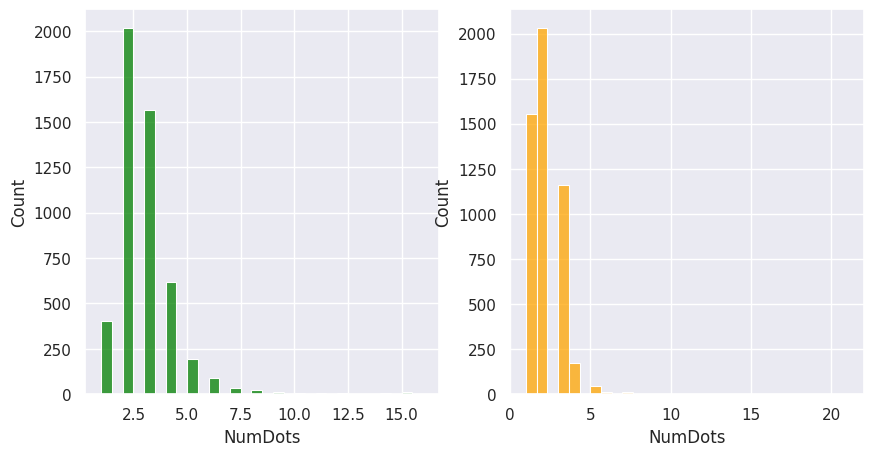

In [13]:
plt.figure(figsize=(21,5))
plt.subplot(1,4, 1);
#1 es si
ax=sns.histplot(dataset.NumDots[dataset.CLASS_LABEL ==1], kde=False, color='green', bins=30, stat='count');
#0 es no
plt.subplot(1,4, 2);
ax=sns.histplot(dataset.NumDots[dataset.CLASS_LABEL ==0], kde=False, color='orange', bins=30, stat='count');


<Axes: xlabel='CLASS_LABEL', ylabel='PathLevel'>

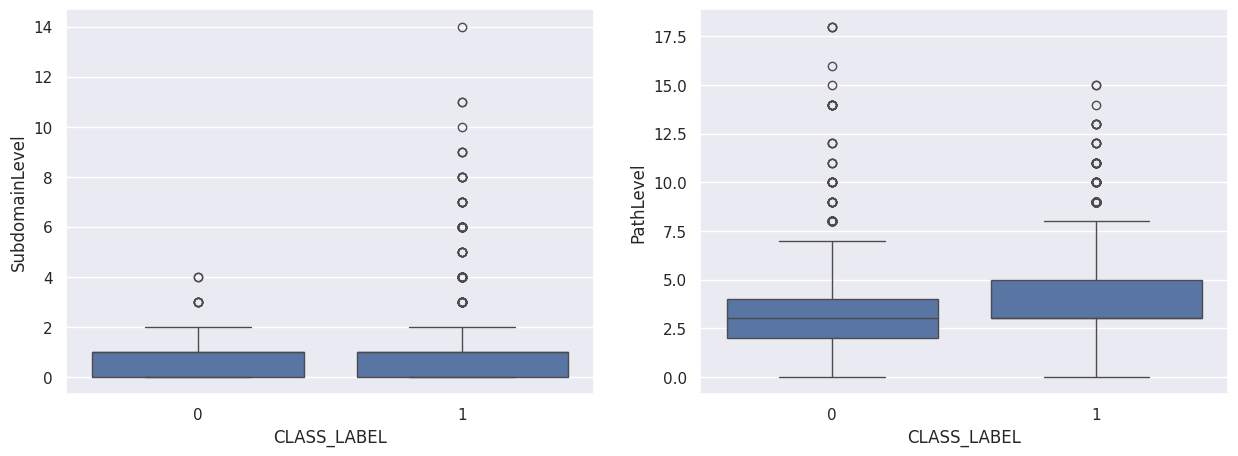

In [14]:
#@title **code** Can you support diagnosis from such variables?
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x="CLASS_LABEL", y="SubdomainLevel", data=dataset)
plt.subplot(1,2,2)
sns.boxplot(x="CLASS_LABEL", y="PathLevel", data=dataset)

<Axes: >

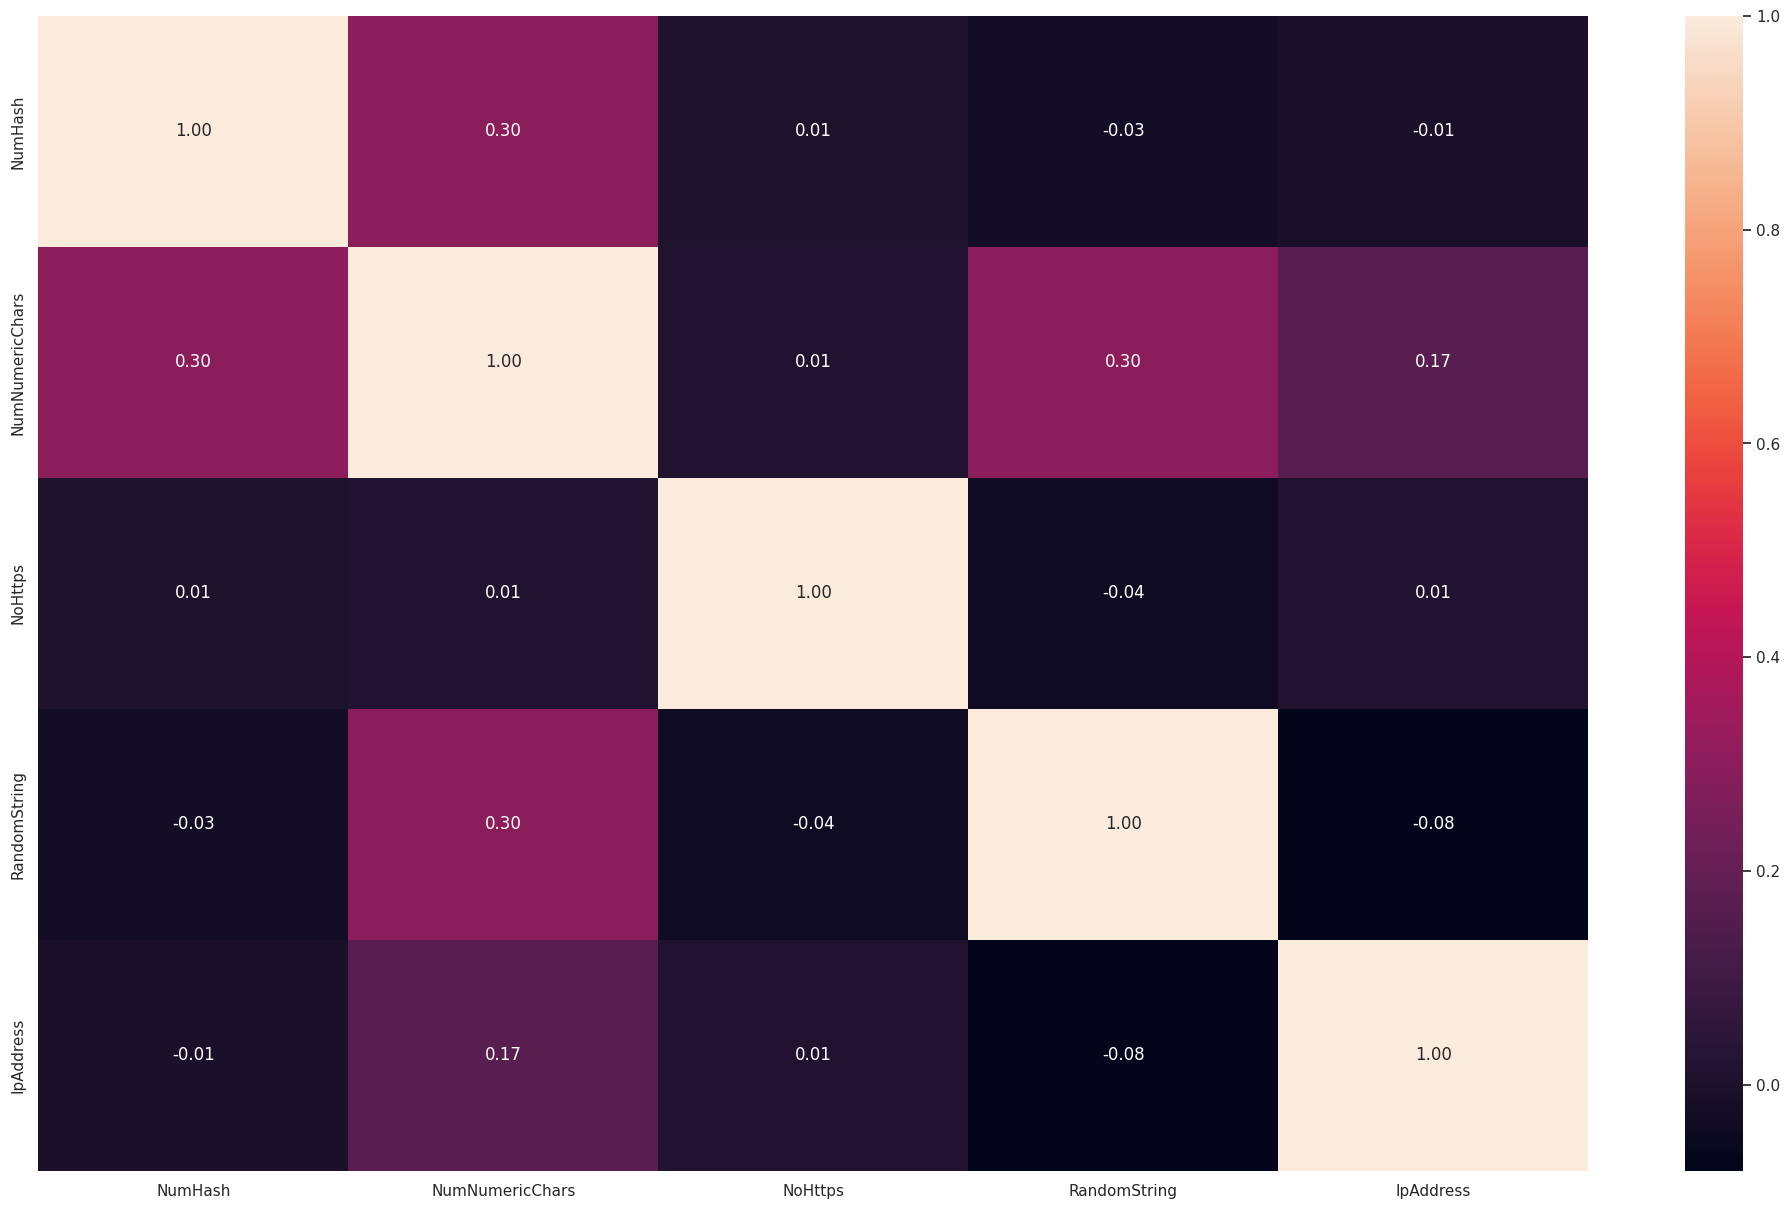

In [15]:
#@markdown **full correlation**
plt.subplots(figsize=(25,15))
selected_columns = list(dataset.columns)[9:14]
correlation_matrix = dataset[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

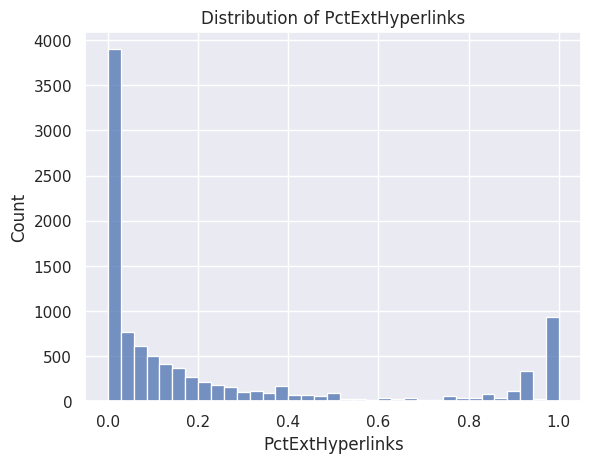

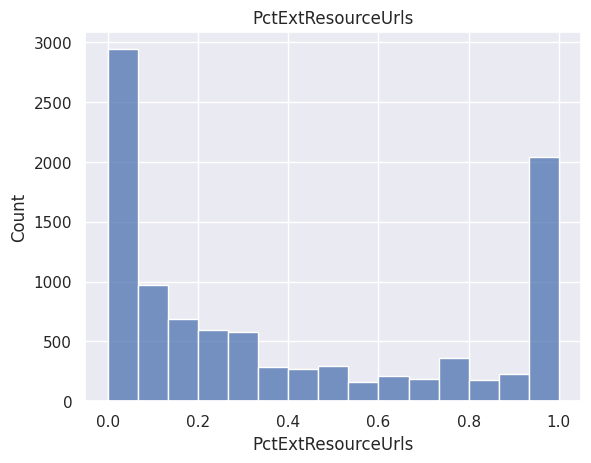

In [16]:
    # Create a figure
    plt.figure()
    # Create a seaborn plot for the current column
    sns.histplot(dataset["PctExtHyperlinks"])
    # Set the title of the plot
    plt.title(f"Distribution of PctExtHyperlinks")
    # Show the plot
    plt.show()

        # Create a figure
    plt.figure()
    # Create a seaborn plot for the current column
    sns.histplot(dataset["PctExtResourceUrls"])
    # Set the title of the plot
    plt.title(f"PctExtResourceUrls")
    # Show the plot
    plt.show()

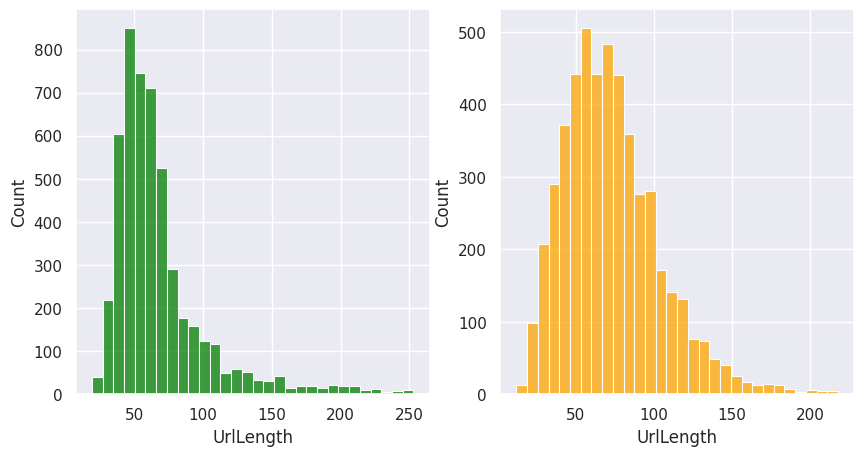

In [17]:
plt.figure(figsize=(21,5))
plt.subplot(1,4, 1);
#1 es si
ax=sns.histplot(dataset.UrlLength[dataset.CLASS_LABEL ==1], kde=False, color='green', bins=30, stat='count');
#0 es no
plt.subplot(1,4, 2);
ax=sns.histplot(dataset.UrlLength[dataset.CLASS_LABEL ==0], kde=False, color='orange', bins=30, stat='count');


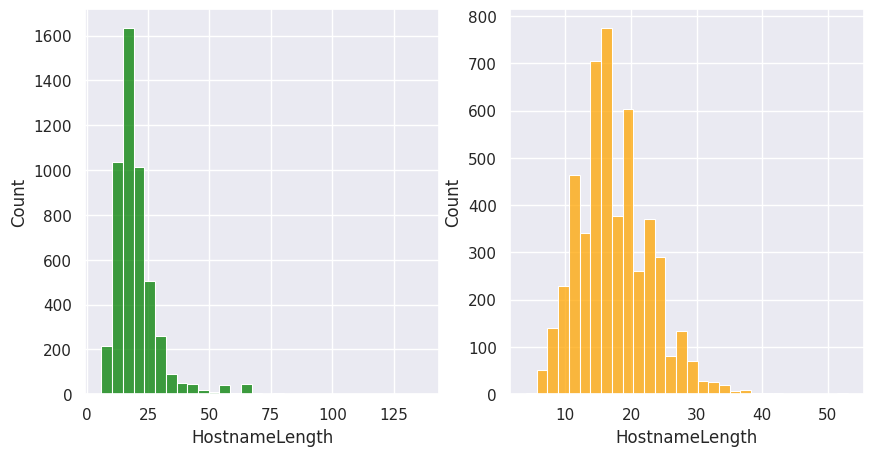

In [18]:
plt.figure(figsize=(21,5))
plt.subplot(1,4, 1);
#1 es si
ax=sns.histplot(dataset.HostnameLength[dataset.CLASS_LABEL ==1], kde=False, color='green', bins=30, stat='count');
#0 es no
plt.subplot(1,4, 2);
ax=sns.histplot(dataset.HostnameLength[dataset.CLASS_LABEL ==0], kde=False, color='orange', bins=30, stat='count');

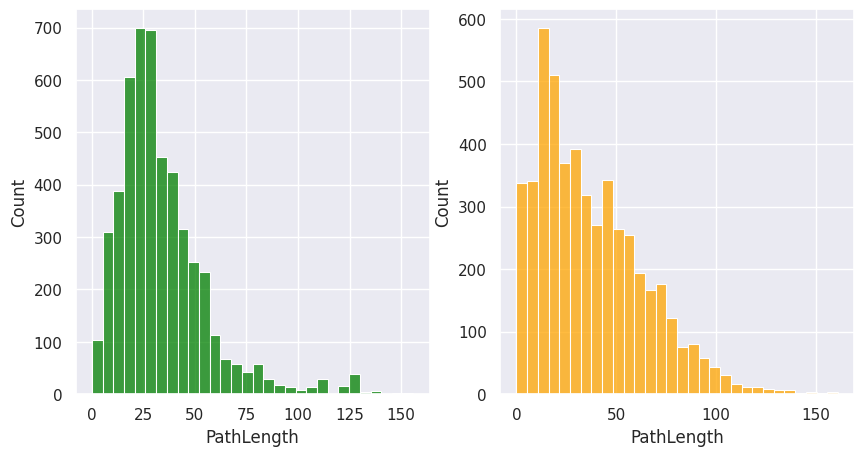

In [19]:
plt.figure(figsize=(21,5))
plt.subplot(1,4, 1);
#1 es si
ax=sns.histplot(dataset.PathLength[dataset.CLASS_LABEL ==1], kde=False, color='green', bins=30, stat='count');
#0 es no
plt.subplot(1,4, 2);
ax=sns.histplot(dataset.PathLength[dataset.CLASS_LABEL ==0], kde=False, color='orange', bins=30, stat='count');

En una URL, el PathLength se refiere a la longitud de la parte de la dirección web que sigue al dominio. Por ejemplo, en la URL "https://www.ejemplo.com/ejemplo/pagina", el PathLength sería 2, ya que hay dos segmentos después del dominio principal (ejemplo y pagina).

Los atacantes de phishing a menudo intentan crear URLs que parezcan legítimas pero que en realidad conducen a sitios web maliciosos

**Detección de dominios fraudulentos**: Los nombres de dominio largos y complejos pueden indicar intentos de phishing.

**Engaño mediante subdominios:** Los atacantes pueden usar subdominios para enmascarar la verdadera identidad del sitio web. Por ejemplo, pueden crear subdominios que contengan nombres de dominio legítimos junto con cadenas adicionales para engañar a los usuarios.

En resuemn el (HostnameLength) puede ser un indicador relevante en la detección de intentos de phishing, ya que los atacantes a menudo intentan engañar a los usuarios mediante la creación de URLs que parecen legítimas pero que en realidad conducen a sitios web maliciosos.



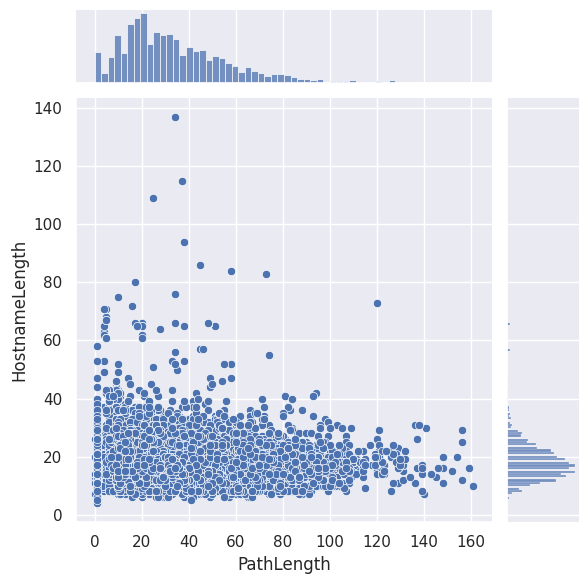

In [20]:
# Utilizar la función jointplot de Seaborn para crear el gráfico
sns.jointplot(x='PathLength', y='HostnameLength', data=dataset, kind='scatter')
plt.show()

# ***Segunda Entrega***

In [21]:
dataset.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,...,DomainInPaths,HostnameLength,PathLength,QueryLength,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,InsecureForms,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,21,44,0,0,0,0.000,0.250000,1,1
1,2,3,1,3,144,2,0,2,1,0,...,0,17,16,103,1,0,0.000,0.000000,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,27,24,0,0,0,0.375,1.000000,1,1
3,4,3,1,6,79,0,0,0,0,0,...,1,22,50,0,0,1,1.000,0.095238,1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,10,29,0,0,0,1.000,1.000000,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import tensorflow as tf
from tensorflow import keras

**DecisionTreeClassifier con parámetros por defecto**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Crear un clasificador DecisionTreeClassifier con parámetros por defecto
clf_default = DecisionTreeClassifier(random_state=42)

# Entrenar el clasificador con los datos de entrenamiento
clf_default.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred_default = clf_default.predict(X_test)

# Calcular el accuracy score para el clasificador por defecto
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f'Accuracy con DecisionTreeClassifier por defecto: {accuracy_default:.4f}')


Accuracy con DecisionTreeClassifier por defecto: 0.4160


Con el arbole de decision usamos el 10% de prueba y el 90 para entrenamiento con una semilla=42 en donde asegura que la division sea reproducible.

**DecisionTreeClassifier: max_depth y criterion, y reportar accuracy_score**

In [ ]:
# Definir los parámetros a sintonizar
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'criterion': ['gini', 'entropy']
}

# Crear un clasificador DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Configurar GridSearchCV con 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Ejecutar la búsqueda de parámetros sobre el conjunto de entrenamiento
grid_search.fit(X_train, y_train)
# Obtener el mejor clasificador y los mejores parámetros encontrados
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f'Los mejores parámetros encontrados: {best_params}')

# Predecir las etiquetas del conjunto de prueba con el mejor clasificador
y_pred_best = best_clf.predict(X_test)

# Calcular el accuracy score para el mejor clasificador
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy con los mejores parámetros: {accuracy_best:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Los mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': 10}
Accuracy con los mejores parámetros: 0.4780


Aca vamos a optimizar y evaluar un DecisionTreeClassifier para clasificar páginas web como legítimas o de phishing, los parametros a opotimizar fueron, max_depth , criterion.

**Se entrena con Con el metodo de GaussianNB**

In [ ]:
print(dataset.shape)
X = dataset.values[:,:-1]
y = dataset.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
est = GaussianNB()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

(10000, 25)
0.917


Entrenamos con Gaussian Naive Bayes usando 80 para entrenar y 20 para testear.

### **Entrenando usando DecisionTree sin usar un Crossvalidation de por medio**

In [ ]:
X = dataset.drop(["NoHttps"], axis=1)
y = dataset["NoHttps"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)
est = DecisionTreeClassifier(max_depth=100)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9935


Al arbol de decision para predecir si una pagina web usa HTTPS o no usando 75 para entrenamiento y 25 para testeo, usamos una profundidad maxima de 100.

**Usando el cross validation**

In [ ]:
est = DecisionTreeClassifier(max_depth=20)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


accuracy 0.995 (+/- 0.00215)


Proporciona una estimación más fiable del rendimiento del modelo al utilizar múltiples subconjuntos de los datos al usar cross validation.

**Random Forest**

In [ ]:
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.995


Entrenamos con Random Forest

**Support vector machine**

In [ ]:

est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9885


Entrenamos con SVM

In [ ]:
est = SVC()

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.989 (+/- 0.00275)


### **Empezamos la regresion**

**DecisionTreeRegressor**

In [ ]:
regressor = DecisionTreeRegressor()
X = dataset.drop(["NumNumericChars"], axis=1)
y = dataset["NumNumericChars"]
regressor.fit(X_train, y_train)

mse_dt = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

MSE depth split data  0.005
RMSE depth split data  0.071
MAE depth split data  0.005


El DecisionTreeRegressor tiene significativamente menor MSE (0.005) en comparación con el RandomForestRegressor (19.602). Esto indica que el árbol de decisión logra predecir NumNumericChars con un error cuadrático medio mucho más bajo en el conjunto de prueba.

**RandomForestRegressor**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

MSE depth split data  19.602
RMSE depth split data  4.427
MAE depth split data  2.472


El RMSE y el MAE también son considerablemente más bajos para el DecisionTreeRegressor en comparación con el RandomForestRegressor. Esto sugiere que el árbol de decisión tiende a tener predicciones más consistentes y menos variables en comparación con el bosque aleatorio.

Text(0.5, 1.0, 'showing only some random 40 test elements (BLACK line is error)')

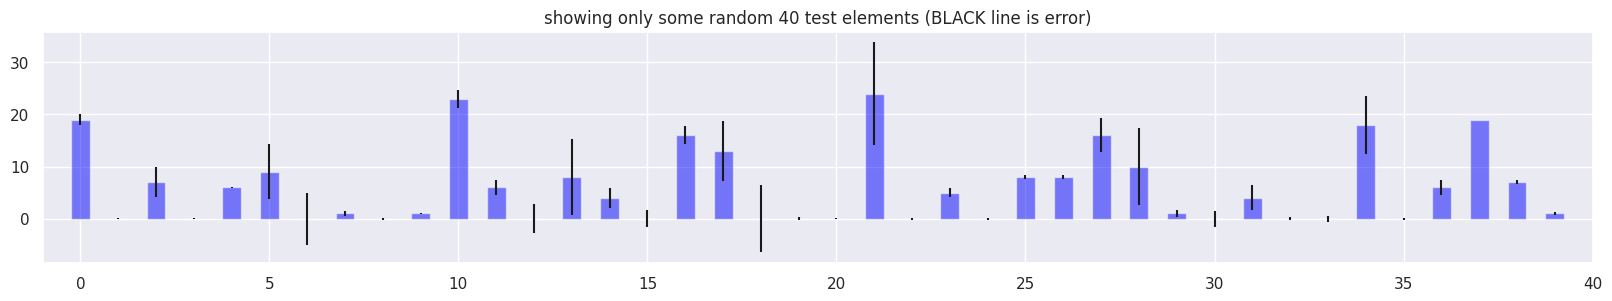

In [ ]:
plt.figure(figsize=(20,3))
preds = regressor.predict(X_test)
errs  = np.abs(y_test - preds)
perm = np.random.permutation(range(len(y_test)))[:40]
plt.bar(range(40), y_test[:40], 0.5, yerr = errs[:40], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

gráfico de barras con barras azules que representan los valores reales del conjunto de prueba (y_test) y barras de error verticales que muestran la magnitud de los errores entre las predicciones del modelo y los valores reales.

In [ ]:
#@title **code** learning curve
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

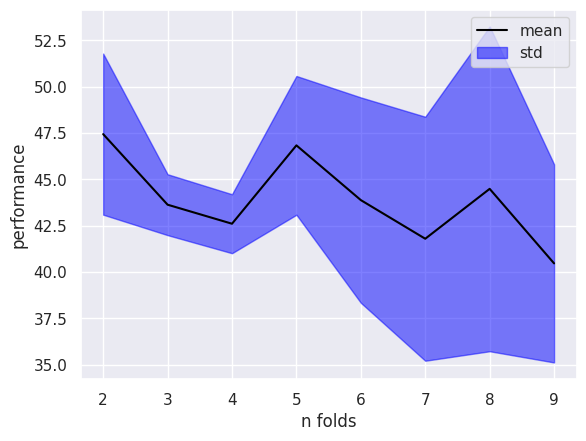

In [ ]:
show_curve(DecisionTreeRegressor())

Podemos ver el comportamiento de los modelos y su estabilidad.

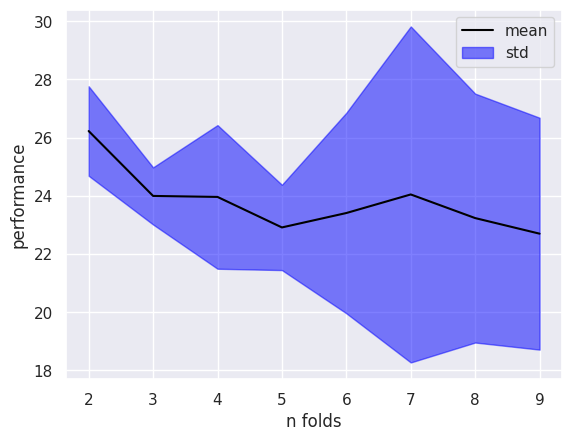

In [ ]:
show_curve(RandomForestRegressor())

**Red Neuronal**

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score


In [23]:
# Cargar los datos de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesar los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a una codificación one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def create_model_1_layer():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_3_layers():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def create_model_6_layers():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


In [ ]:
epochs_list = [10, 20, 30]
accuracies = []

def train_and_evaluate_model(create_model_func, epochs_list):
    for epochs in epochs_list:
        model = create_model_func()
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=0)
        loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
        accuracies.append((epochs, accuracy))
        print(f'{create_model_func.__name__} - Epochs: {epochs}, Accuracy: {accuracy:.4f}')

print("Training model with 1 hidden layer")
train_and_evaluate_model(create_model_1_layer, epochs_list)

print("\nTraining model with 3 hidden layers")
train_and_evaluate_model(create_model_3_layers, epochs_list)

print("\nTraining model with 6 hidden layers")
train_and_evaluate_model(create_model_6_layers, epochs_list)


Training model with 1 hidden layer
create_model_1_layer - Epochs: 10, Accuracy: 0.9782
create_model_1_layer - Epochs: 20, Accuracy: 0.9802
create_model_1_layer - Epochs: 30, Accuracy: 0.9791

Training model with 3 hidden layers
create_model_3_layers - Epochs: 10, Accuracy: 0.9777
create_model_3_layers - Epochs: 20, Accuracy: 0.9786
create_model_3_layers - Epochs: 30, Accuracy: 0.9790

Training model with 6 hidden layers
create_model_6_layers - Epochs: 10, Accuracy: 0.9738
create_model_6_layers - Epochs: 20, Accuracy: 0.9776
create_model_6_layers - Epochs: 30, Accuracy: 0.9759


Podemos ver una leve diferencia al usar 1 ,3 y 6 capas, disminuyendo y tal vez haciendo mas real la prediccion.

In [ ]:
for model_type, accuracy in accuracies:
    print(f'{model_type} with {epochs} epochs: {accuracy:.4f}')


10 with 10 epochs: 0.9782
20 with 10 epochs: 0.9802
30 with 10 epochs: 0.9791
10 with 10 epochs: 0.9777
20 with 10 epochs: 0.9786
30 with 10 epochs: 0.9790
10 with 10 epochs: 0.9738
20 with 10 epochs: 0.9776
30 with 10 epochs: 0.9759


In [ ]:
# Crear el clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Definir el método de validación cruzada con KFold (10 folds)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Realizar la validación cruzada y obtener los scores de accuracy
scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

# Calcular la media y la desviación estándar de los scores de accuracy
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(mean_accuracy)
print(std_accuracy)
reg = DecisionTreeRegressor(random_state=42)
scores_reg = cross_val_score(reg, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores_reg
print(f'Regressor MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')

0.42519999999999997
0.012327205684987992
Regressor MSE: 42.0867 ± 8.0092
